# Scipy.stats

### GMIT Machine Learning and Statistics
***
### Student: Aine Nic Dhonnacha
***
### Email: G00259400@gmit.ie
***

 <img style="float: left;" src="images/scipy-logo.png" width="200">


 [image source](https://medium.com/python-data/scipy-stack-pythons-number-cruncher-9e4bcd906185) 

Table of contents
=================

  * [Import Libraries](#library)
* [An overview of the scipy-stats Python Library](#Anoverviewofthescipy-statsPythonLibrary)
   * [Scipy-stats Probability distributions](#pd)
       * [Scipy-stats.norm](#norm)
       * [scipy.stats.uniform](#uniform)
       * [scipy.stats.binom](#)
       * [scipy.stats.bernoulli ](#bern)
       * [scipy.stats.rv_histogram](#rv_h)
   * [Descriptive Statistics ](#descriptive)   
* [Anova](#Anova)
   * [Assumptions of Anova](#anovass)
   * [An example hypothesis test using ANOVA](#AnexamplehypothesistestusingANOVA)
       * [One-way Anova](#one-wayAnova)
           * [Choosing an appropriate data set](#Choosing)
           * [Testing Assumptions](#Assumptions)
           * [Conducting an one-way ANOVA using scipy.stats](#conducting)
           * [Post-hoc Testing](#Post-hocTesting)
       * [Two-way Anova](#twoway)
       * []()
       * []()
   * [](#)
       * []()
       * []()
       * []()
* [References](#References)



## Import libraries: <a name = "library"> </a>
<div class="alert alert-info">
    <strong>Note:</strong>
The main libraries used are listed here,  scipy.stats specific imports are within the codes where they are used.  </div>

***

In [1]:
# Data frames.
import pandas as pd

# Plotting.
import seaborn as sns

#scipy
import scipy

# Stats.
import scipy.stats as stats

# Numerical arrays.
import numpy as np

# Collections.
import collections as co

# Specials.
import scipy.special as spec

# Alternative statistics package.
import statsmodels.stats.weightstats as stat

# another stats python function which I am using to create quick tables
import statsmodels.api as sm
from statsmodels.formula.api import ols

# researchy produces Pandas DataFrames that contain relevant statistical testing information
import researchpy as rp

# for plots
import matplotlib.pyplot as plt 

# plot style
plt.style.use("ggplot")

# Bigger plots
plt.rcParams["figure.figsize"] = (16,8)

# An overview of the scipy-stats Python Library <a name = "Anoverviewofthescipy-statsPythonLibrary"></a>


SciPy is a scientific computation library that uses NumPy underneath.
SciPy stands for Scientific Python. 
All of the statistics functions are located in the sub-package <b>scipy.stats</b>. 
A complete list of these functions can be obtainted using the following command. 

 `scipy.info(stats)`
 
 <br>
 
[Tutorialspoint.com](https://www.tutorialspoint.com/scipy/scipy_stats.htm)

 <br>
 
This produces a long list of information about the statistical functions in the module. Scipy.stats contains a large number of probability distributions as well as a growing library of statistical functions. Each univariate distribution is an instance of a subclass of `rv_continuous`and `rv_discrete` for discrete distributions. It also contains Correlation functions such as `f_oneway` which is used in one-way-Anova. Statistical tests such as `ttest_1samp` which is used to calculate the T-test for the mean of one group of scores. For a full list of statistical functions within the package see the  [scipy.stats documentation](https://docs.scipy.org/doc/scipy/reference/stats.html). 
Scipy-stats is mainly used for probabilistic distributions and statistical operations. 

## Scipy-stats Probability distributions  <a name = "pd"></a>

Each univariate distribution has its own subclass as described in the following table −

![image](images/class-description.png)
[image source](https://www.tutorialspoint.com/scipy/scipy_stats.htm)

### Scipy.stats.norm <a name ="norm"> </a> (rv_continuous)

Continuous random variable is a probability distribution in which the random variable X can have any value.
The mean is specified by the location `loc` keyword.
The standard deviation is specified via the scale `scale` keyword.

The norm object inherits a collection of generic methods from the rv continuous class and completes them with details specific to the particular distribution. [(tutorialspoint)](https://www.tutorialspoint.com/scipy/scipy_stats.htm)

We can pass a list or a NumPy array to compute the Cumulative distribution function at a number of points. In probability theory and statistics,  the cumulative distribution function (often shortend to CDF) of a real-valued random variable X, or simply distribution function of X, assessed at x, is the probability that X will take a value less than or equal to x. [(CDF definition)](https://en.wikipedia.org/wiki/Cumulative_distribution_function)





~~~
scipy.stats.norm = <scipy.stats._continuous_distns.norm_gen object>
~~~
[(scipy documentation)](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html)


In [2]:
# import scpi.stats norm rv_continuous distribution
from scipy.stats import norm

# the norm.cdf command finds the cumulative distribution function of the given random variables
print (norm.cdf(np.array([1,-1., 0, 1, 3, 4, -2, 6])))

[0.84134475 0.15865525 0.5        0.84134475 0.9986501  0.99996833
 0.02275013 1.        ]


You can generate a normally distributed random variable using scipy.stats module's <b> norm.rvs()</b> method. The loc argument corresponds to the mean of the distribution. scale corresponds to standard deviation and size to the number of random variates.

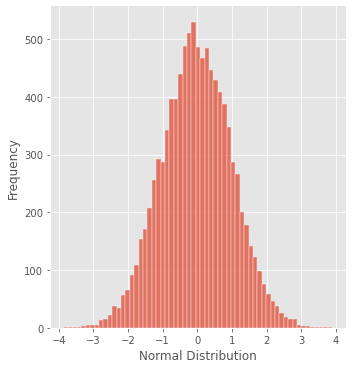

In [3]:
# generate random variables from N(0,1)
data_normal = norm.rvs(size=10000,loc=0,scale=1)

# plot the random random variables
ax = sns.displot(data_normal)
ax.set(xlabel='Normal Distribution', ylabel='Frequency')

The Percent Point Function (PPF), which is the inverse of the cumulative distribution function (CDF), can be used to find the median of a distribution.

In [4]:
# finding the percent point of 0.5
print(norm.ppf(0.5))

0.0


In [5]:
# Random variates of given type.
print (norm.rvs(size = 5))

[-0.06972245  0.65170543 -0.79437245 -0.47255253 -0.12492289]


## scipy.stats.uniform <a name = "uniform"></a> (rv_continuous)

In statistics, uniform distribution refers to a type of probability distribution in which all outcomes are equally likely.


~~~
scipy.stats.uniform = <scipy.stats._continuous_distns.uniform_gen object>
~~~

In [6]:
#import scipy uniform distribution
from scipy.stats import uniform
#print the uniform cumulative distribution function of the following array
print (uniform.cdf([0, 1, 2, 3, 4, 5], loc = 1, scale = 4))

[0.   0.   0.25 0.5  0.75 1.  ]


## scipy.stats.binom  <a name = "binomial"></a> (rv_discrete)
A binomial discrete random variable. <b>binom.rvs()</b> method takes n (number of trials) and p (probability of success) as shape parameters. Size decides the number of times to repeat the trials.


In [7]:
from scipy.stats import binom

# 10 number of trials, 50% probability of success repeated 1000 times
data_binom = binom.rvs(n=10,p=0.5,size=100)

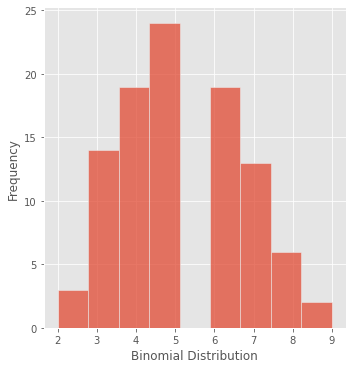

In [8]:
# plot 
ax = sns.displot(data_binom)
ax.set(xlabel='Binomial Distribution', ylabel='Frequency')

<b>scipy.stats.binom_test(k, n, p=0.5, alternative='two-sided')</b>
performs a test that the probability of success is p.

Here is a great example from the scipy-stats documentation: 

A car manufacturer claims that no more than 10% of their cars are unsafe. 15 cars are inspected for safety, 3 were found to be unsafe. Test the manufacturer’s claim:

In [9]:
#import binom test to test the probability of success is p 
stats.binom_test(3, n=15, p=0.1, alternative='greater')


0.18406106910639114

The null hypothesis cannot be rejected at the 5% level of significance because the returned p-value is greater than the critical value of 5%. [scipy documentation](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.binom_test.html)

### scipy.stats.bernoulli <a name = "bern"></a> ( rv_discrete )
~~~
scipy.stats.bernoulli = <scipy.stats._discrete_distns.bernoulli_gen object>
~~~
A Bernoulli distribution has only two possible outcomes, namely 1 (success) and 0 (failure), and a single trial, for example, a coin toss.
The `bernoulli.rvs()` method  takes p (probability of success) as a shape parameter. `loc` parameter can be used to shift the distribution. Size decides the number of times to repeat the trials.. [datacamp](https://www.datacamp.com/community/tutorials/probability-distributions-python)



In [10]:
# import bernouilli distribution
from scipy.stats import bernoulli
# 10000 trials with a probability of 60%
data_bern = bernoulli.rvs(size=10000,p=0.6)

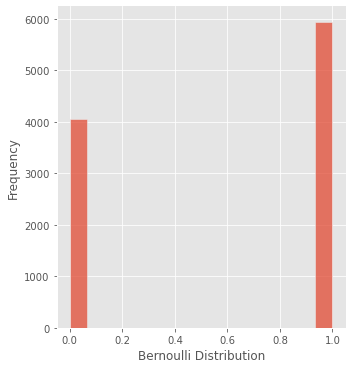

In [11]:
#plot of above probability
ax= sns.displot(data_bern)
ax.set(xlabel='Bernoulli Distribution', ylabel='Frequency')

We can see two possible outcomes in the visualisation. 

### scipy.stats.rv_histogram <a name = "rv_h"></a>
Generates a distribution given by a histogram. This is useful to generate a template distribution from a binned
datasample. Binning is a way to group a number of more or less continuous values into a smaller number of "bins". [What is binning?](https://docs.tibco.com/pub/spotfire/7.0.1/doc/html/bin/bin_what_is_binning.htm)

You can create a scipy.stats distribution from a numpy histogram [scipy documentation](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.rv_histogram.html)

In [12]:
# making a nupy histogram with scipy.stats.rv()
data = scipy.stats.norm.rvs(size=100000, loc=0, scale=1.5, random_state=123)
hist = np.histogram(data, bins=100)
hist_dist = scipy.stats.rv_histogram(hist)

In [13]:
# Behaves like an ordinary scipy rv_continuous distribution
# Percent point function 
hist_dist.pdf(1.0)

0.20538577847618705

In [14]:
# Cumulative distribution function of the given RV.
hist_dist.cdf(2.0)

0.908185685430565

PDF is zero above (below) the highest (lowest) bin of the histogram,
defined by the max (min) of the original dataset

In [15]:
# PDF is zero above (below) the highest (lowest) bin of the histogram,
# defined by the max (min) of the original dataset
hist_dist.pdf(np.max(data))

0.0

In [16]:

hist_dist.cdf(np.max(data))

1.0

In [17]:
hist_dist.pdf(np.min(data))


7.759190724449831e-05

In [18]:
hist_dist.cdf(np.min(data))


0.0

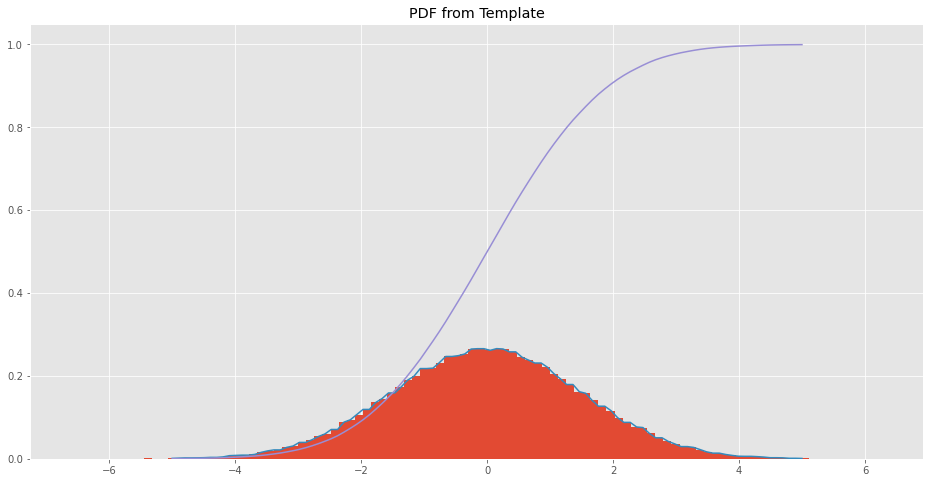

In [19]:
#  PDF and CDF follow the histogram
import matplotlib.pyplot as plt
X = np.linspace(-5.0, 5.0, 100)
plt.title("PDF from Template")
plt.hist(data, density=True, bins=100)
plt.plot(X, hist_dist.pdf(X), label='PDF')
plt.plot(X, hist_dist.cdf(X), label='CDF')
plt.show()

## Descriptive Statistics<a name = "descriptive"></a>

The basic stats such as Min, Max, Mean and Variance takes the NumPy array as input and returns the respective results. A few basic statistical functions available in the scipy.stats package are described in the following few paragraphs. 



`scipy.stats.describe(array, axis=0)` -  computes the descriptive statistics of the passed array elements along the specified axis of the array. 

In [20]:
# Input array having the elements to calculate the statistics.
array = [9, 3, 27] 
   
# pass array into stats.describe() 
describing = stats.describe(array)

# Returns : Statistics of the array elements based on the set parameters.
print("No. of observations is :\n", describing) 

No. of observations is :
 DescribeResult(nobs=3, minmax=(3, 27), mean=13.0, variance=156.0, skewness=0.5280049792181878, kurtosis=-1.5)


`scipy.stats.mstats.gmean(a, axis=0, dtype=None, weights=None)` - Computes the geometric mean along the specified axis.

In [21]:
# import gmean
from scipy.stats import gmean

# Return the geometric average of the array. 
gmean([1, 4])

2.0

`scipy.stats.hmean(array, axis=0, dtype=None)` -  calculates the harmonic mean of the array elements along the specified axis of the array.  ![image](images/HarmonicMean.png) [image source](https://www.geeksforgeeks.org/scipy-stats-hmean-python/)

In [22]:
# Harmonic Mean 
from scipy.stats.mstats import hmean 
array = hmean([1, 3, 27]) 
   
print("Harmonic Mean is :", array) 

Harmonic Mean is : 2.1891891891891895


` scipy.stats.kurtosis(a, axis=0, fisher=True, bias=True, nan_policy='propagate')` - Compute the kurtosis (Fisher or Pearson) of a dataset. Kurtosis is the fourth central moment divided by the square of the variance. If Fisher’s definition is used, then 3.0 is subtracted from the result to give 0.0 for a normal distribution.

If bias is False then the kurtosis is calculated using k statistics to eliminate bias coming from biased moment estimators. [(scipy documentation)](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.kurtosis.html)
In simple terms, one can say it is a measure of how heavy tail is compared to a normal distribution.

![image](images/kurtosis.png)


Kurtosis for normal distribution : -0.3073930877422071

Kurtosis for normal distribution : 2.692606912257793

Kurtosis for normal distribution : -0.3073930877422071


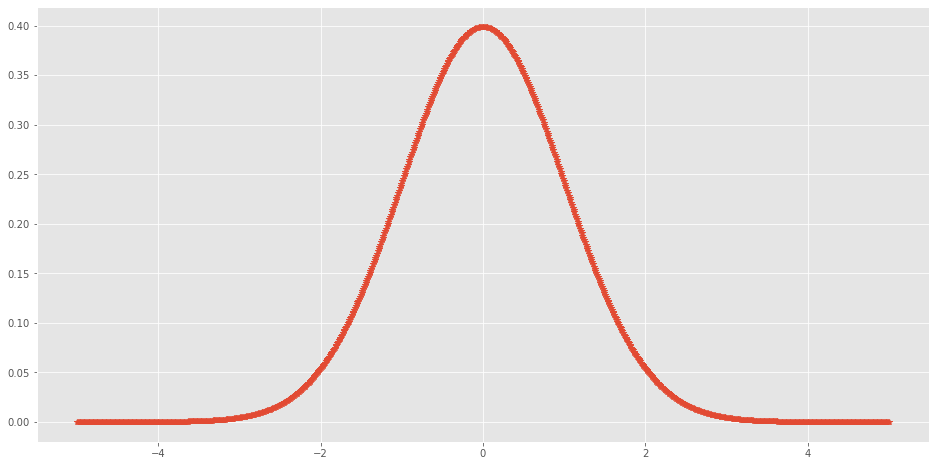

In [23]:
# Graph using numpy.linspace() 
# finding kurtosis
# https://www.geeksforgeeks.org/scipy-stats-kurtosis-function-python/?ref=gcse
  
from scipy.stats import kurtosis
import numpy as np 
import pylab as p 
  
x1 = np.linspace( -5, 5, 1000 )
y1 = 1./(np.sqrt(2.*np.pi)) * np.exp( -.5*(x1)**2  )
  
p.plot(x1, y1, '*')
  
  
print( '\nKurtosis for normal distribution :', kurtosis(y1))
  
print( '\nKurtosis for normal distribution :', 
      kurtosis(y1, fisher = False))
  
print( '\nKurtosis for normal distribution :', 
      kurtosis(y1, fisher = True))



The Laplace distribution has a heavier tail than the normal distribution. The uniform distribution (which has negative kurtosis) has the thinnest tail. [[geeksforgeeks)](https://www.geeksforgeeks.org/scipy-stats-kurtosis-function-python/?ref=gcse)

`scipy.stats.mode(array, axis=0)` -  function calculates the mode of the array elements along the specified axis of the array. ![image](images/Mode.png) [image source](https://www.geeksforgeeks.org/scipy-stats-mode-function-python/) 

where,
- l : Lower Boundary of modal class
- h : Size of modal class
- fm : Frequency corresponding to modal class
- f1 : Frequency preceding  to modal class
- f2 : Frequency proceeding to modal class
- [(geeksforgeeks)](https://www.geeksforgeeks.org/scipy-stats-mode-function-python/)



In [24]:
# Arithmetic mode  
#Axis along which the mode is to be computed.
arr = np.array([[1, 3, 27, 13, 21, 9],
                [8, 12, 8, 4, 7, 10]]) 
   
 # print Modal values of the array elements based on the set parameters. 
print("Arithmetic mode is : \n", stats.mode(arr)) 

Arithmetic mode is : 
 ModeResult(mode=array([[1, 3, 8, 4, 7, 9]]), count=array([[1, 1, 1, 1, 1, 1]]))


`scipy.stats.skew(array, axis=0, bias=True)` - function calculates the skewness of the data set.

skewness = 0 : normally distributed.
skewness > 0 : more weight in the left tail of the distribution.
skewness < 0 : more weight in the right tail of the distribution. 

![image](images/skewness.png) [image source](https://www.geeksforgeeks.org/scipy-stats-skew-python/) 


Skewness for data :  1.1108237139164436


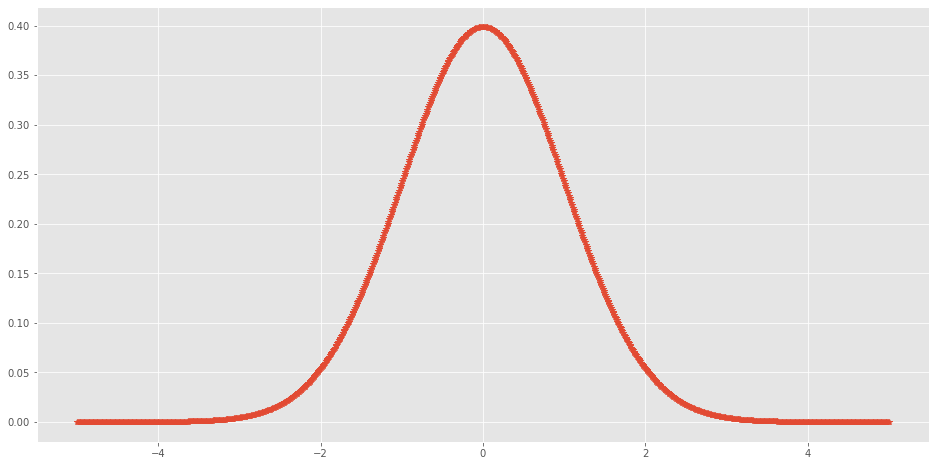

In [25]:
# Graph using numpy.linspace() 
# finding Skewness
  
from scipy.stats import skew
import pylab as p 
  
x1 = np.linspace( -5, 5, 1000 )
y1 = 1./(np.sqrt(2.*np.pi)) * np.exp( -.5*(x1)**2  )
  
p.plot(x1, y1, '*')
  
print( '\nSkewness for data : ', skew(y1))

`scipy.stats.iqr(x, axis=None, rng=(25, 75), scale='raw', nan_policy='propagate', interpolation='linear', keepdims=False)` - Compute the interquartile range of the data along the specified axis.

In [26]:
# Interquartile range using scipy.stats.iqr
from scipy.stats import iqr
x = np.array([[10, 7, 4], [3, 2, 1]])
x
iqr(x)

4.0

`scipy.stats.zscore(a, axis=0, ddof=0, nan_policy='propagate')` - Computes the z score of each value in the sample, relative to the sample mean and standard deviation.

In [27]:
a = np.array([[ 0.3148,  0.0478,  0.6243,  0.4608],

              [ 0.7149,  0.0775,  0.6072,  0.9656],

              [ 0.6341,  0.1403,  0.9759,  0.4064],

              [ 0.5918,  0.6948,  0.904 ,  0.3721],

              [ 0.0921,  0.2481,  0.1188,  0.1366]])

# using n-1 degrees of freedom (ddof=1) to calculate the standard deviation:
stats.zscore(a, axis=1, ddof=1)

array([[-0.19264823, -1.28415119,  1.07259584,  0.40420358],
       [ 0.33048416, -1.37380874,  0.04251374,  1.00081084],
       [ 0.26796377, -1.12598418,  1.23283094, -0.37481053],
       [-0.22095197,  0.24468594,  1.19042819, -1.21416216],
       [-0.82780366,  1.4457416 , -0.43867764, -0.1792603 ]])

`scipy.stats.sem(arr, axis=0, ddof=0) ` - used to compute the standard error of the mean of the input data.

In [28]:
# stats.sem() method 

#Input array or object having the elements to calculate the standard error.
arr1 = [[20, 2, 7, 1, 34],
        [50, 12, 12, 34, 4]]
  
arr2 = [50, 12, 12, 34, 4]
  
print ("\narr1 : ", arr1)
print ("\narr2 : ", arr2)
  

# ddof : Degree of freedom correction for Standard Deviation.  
# Results : standard error of the mean of the input data.
print ("\nsem ratio for arr1 : ", 
       stats.sem(arr1, axis = 0, ddof = 0))
  
print ("\nsem ratio for arr1 : ", 
       stats.sem(arr1, axis = 1, ddof = 0))
  
print ("\nsem ratio for arr1 : ", 
       stats.sem(arr2, axis = 0, ddof = 0))


arr1 :  [[20, 2, 7, 1, 34], [50, 12, 12, 34, 4]]

arr2 :  [50, 12, 12, 34, 4]

sem ratio for arr1 :  [10.60660172  3.53553391  1.76776695 11.66726189 10.60660172]

sem ratio for arr1 :  [5.62423328 7.61892381]

sem ratio for arr1 :  7.618923808517841


### Scipy.stats Independent T-test
***

`scipy.stats.ttest_ind(a, b, axis=0, equal_var=True, nan_policy='propagate', permutations=None, random_state=None, alternative='two-sided', trim=0)`
- calculates the T-test of the means of two independent samples of scores. This test assumes that the populations have identical variances by default.[(stats documentation)](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html)

T-test assumptions
***
1. Distributions are normal
2. Samples have equal variences
3. the two samples are independent. 

The following data set is from an example used on python for datascience available [here](https://www.pythonfordatascience.org/independent-samples-t-test-python/)

In [29]:
# load a dataset which is assumed to meet these assumptions. 
df = pd.read_csv("https://raw.githubusercontent.com/researchpy/Data-sets/master/blood_pressure.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   patient    120 non-null    int64 
 1   sex        120 non-null    object
 2   agegrp     120 non-null    object
 3   bp_before  120 non-null    int64 
 4   bp_after   120 non-null    int64 
dtypes: int64(3), object(2)
memory usage: 4.8+ KB


### Shapiro-Wilk (SW) test
***


In [30]:
# Coming from independent t-test framework
sampling_difference = df['bp_after'][df['sex'] == 'Male'].values - \
                      df['bp_after'][df['sex'] == 'Female'].values

stats.shapiro(sampling_difference)

ShapiroResult(statistic=0.98586106300354, pvalue=0.7147841453552246)

In [31]:

sampling_difference = df['bp_after'][df['sex'] == 'Male'].values - \
                    df['bp_after'][df['sex'] == 'Female'].values

stats.normaltest(sampling_difference)

NormaltestResult(statistic=0.003175119018886905, pvalue=0.9984136999965528)

### Kolmogorov-Smirnov (KS) test
***
The Kolmogorov-Smirnov test is a distance test (D'Agostino, 1971). It evaluates normality by comparing the data's empirical distribution function to the expected cumulative distribution function of the comparison distribution (Öztuna D., Elhan A., & Tüccar, 2006)

Testing the difference between two groups can be done using `scipy.stats.ks_2samp(data1, data2)` 

In [32]:
stats.ks_2samp(df['bp_after'][df['sex'] == 'Male'],
               df['bp_after'][df['sex'] == 'Female'])

KstestResult(statistic=0.36666666666666664, pvalue=0.0005569710611454617)

### Equality of Variance Tests
***
## Barlett's test
***
`scipy.stats.bartlett(*args)` 

In [33]:
stats.bartlett(df['bp_after'][df['sex'] == 'Male'],
               df['bp_after'][df['sex'] == 'Female'])

BartlettResult(statistic=3.9379638422812793, pvalue=0.047207884641474476)

## Levene's test 
***
` scipy.stats.levene(*args, center='median', proportiontocut=0.05)`

 [Levene's test](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.levene.html#scipy.stats.levene) is less sensitive than Barlett's test to departures from normality and power (Conover, 1981).Levene's test of homogeneity of variances can test for equality between 2 or more groups. 

In [34]:
# Using the mean
stats.levene(df['bp_after'][df['sex'] == 'Male'],
             df['bp_after'][df['sex'] == 'Female'])

LeveneResult(statistic=5.0464151793144625, pvalue=0.026537264851214513)

# Anova<a name = "Anova"></a>
The ANOVA name stands for 'ANalysis Of VAriance', it is a statistical test used to analyze the difference between the mean of more than two groups. All anovas are designed to test the differences among three or more groups. T-tests should be used to test the difference between two groups. 


The intent of hypothesis testing is to formally examine two opposing hypotheses(conjectures), H(0) and H(A). 
  - H(0) is the Null Hypothesis where there is no significant difference among the groups.
  - H(a) is the Alternate Hypothesis where there is a significant difference among the groups.
  
<br>
These two hypotheses are mutually exclusive so that one is true to the exclusion of the other. The goal is to accumulate evidence and analyze sample information for the purpose of determining which of the two hypotheses is true and which is false. 

<div class="alert alert-success">
  <strong>Good quote: </strong> " A fact is a simple statement that everyone believes. It’s innocent, unless found guilty. A Hypothesis is a novel suggestion that no one wants to believe. It’s guilty, until found effective.” – Edward Teller (Hungarian-born American theoretical physicist.) 

### One-way Anova <a name = "one-wayAnova"></a>

***
A one-way ANOVA is used for two or more groups of data, to gain information about the relationship between the dependent and independent variables. It is usually used when there are a minimum of three groups.It is an omnibus test, it tests for a difference overall, i.e. at least one of the groups is statistically significantly different than the others. 
However, if the ANOVA is signifcant, we can not well which group is different, for this we have to conduct planned or post-hoc comparisons.   As with all parametric tests, there are certain conditions that need to be met in order for the test results to be considered reliable. It is called one-way because the groups being tested are under one categorical variable and the name refers to the number of variables in the analysis and not the number of groups. 

"When working from the ANOVA framework, independent variables are sometimes referred to as factors and the number of groups within each variable are called levels, i.e. one variable with 3 categories could be referred to as a factor with 3 levels.
<br>

 
 The formula for one-way Anova is: 
      ![image](images/equation_one_way_anova.svg)


[image source](https://www.statsdirect.com/help/analysis_of_variance/one_way.htm)

"Numerically, one way ANOVA is a generalisation of the two sample t test. The F statistic compares the variability between the groups to the variability within the groups.
- where F is the variance ratio for the overall test, MST is the mean square due to treatments/groups (between groups), MSE is the mean square due to error (within groups, residual mean square), Yij is an observation, Ti is a group total, G is the grand total of all observations, ni is the number in group i and n is the total number of observations."

Parametric test assumptions

    - Population distributions are normal
    - Samples have equal variances
    - Independence
"[pythonfordatascience](https://www.pythonfordatascience.org/anova-python/)


## An example hypothesis test using ANOVA<a name = "AnexamplehypothesistestusingANOVA"></a>

***


Choosing the right data set, making sure it meets the underlying assumptions of Anova. 


###  Assumptions of Anova <a name = "anovass"></a>

***

1. Independence. 
  - All samples are drawn independently of each other.
  - Within each sample, the observations are sampled randomly and independently of each other.
2. Normality
  - Each group sample is drawn from a normally distributed population.
3. Homogeneity of variances 
  - All comparison groups have a common variance.

[(real-statistics.com)](https://www.real-statistics.com/one-way-analysis-of-variance-anova/assumptions-anova/)

### Choosing an appropriate data set: <a name ="Choosing"></a> 
***

To choose an appropriate dataset for one-way anova, I researched Anova suited data sets and found a github called  [Open source for data science](https://github.com/Opensourcefordatascience/Data-sets). I downloaded [difficile.csv](https://github.com/Opensourcefordatascience/Data-sets/blob/master/difficile.csv), it is a fictitious data about the effects of clinical dosing on libido that was created to be used in an example of ANOVA at [python for data science.](https://www.pythonfordatascience.org/anova-python/)


about the dataset:
~~~
"A new medication was developed to increase the libido of those who take the medication. The purpose of this study was to test for a difference between the dosage levels. The overall average libido was 3.5 95% CI(2.5, 4.4) with group averages of 2.2 95% CI(0.9, 3.5) for the placebo group; 3.2 95% CI(1.9, 4.5) for the low dose group; and 5.0 95% CI(3.5, 6.5) for the high dose group. There is a statistically significant difference between the groups and their effects the libido, F= 5.12, p-value= 0.0247." 
~~~ 
[python for data science.](https://www.pythonfordatascience.org/anova-python/)


In [35]:
# loading data to take a high level look at the variables
df = pd.read_csv("datasets/difficile.csv")
df.drop('person', axis= 1, inplace= True)

# Recoding value from numeric to string
df['dose'].replace({1: 'placebo', 2: 'low', 3: 'high'}, inplace= True)

# dataset info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   dose    15 non-null     object
 1   libido  15 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 368.0+ bytes


In [36]:
# data description
df.describe()

,libido
count,15.000000
mean,3.466667
std,1.767430
min,1.000000
25%,2.000000
50%,3.000000
75%,4.500000
max,7.000000


<b> Researchpy </b>
~~~
"Researchpy produces Pandas DataFrames that contain relevant statistical testing information. The information is returned as Pandas DataFrames to make for quick and easy exporting of results to any format/method that works with the traditional Pandas DataFrame. researchpy is essentially a wrapper that combines various established packages such as pandas, scipy.stats, and statsmodels to get all the standard required information in one method. " 
~~~ 
[researchpy](https://pypi.org/project/researchpy/)

In [37]:
# using researchpy for quick summary 
rp.summary_cont(df['libido'])

,Variable,N,Mean,SD,SE,95% Conf.,Interval
0,libido,15.0,3.4667,1.7674,0.4563,2.4879,4.4454


In [38]:
rp.summary_cont(df['libido'].groupby(df['dose']))

,N,Mean,SD,SE,95% Conf.,Interval
dose,,,,,,
high,5,5.0,1.5811,0.7071,3.0368,6.9632
low,5,3.2,1.3038,0.5831,1.5811,4.8189
placebo,5,2.2,1.3038,0.5831,0.5811,3.8189


StatsModels can produce an Anova table for one or more fitted linear models.
<br>
<b>  statsmodels.stats.anova.anova_lm(*args, **kwargs)</b> [statsmodels documentation](https://www.statsmodels.org/dev/generated/statsmodels.stats.anova.anova_lm.html)



In [39]:
# import statsmodels
import statsmodels.api as sm
from statsmodels.formula.api import ols

#create statsmodels table
model = ols('libido ~ C(dose)', data=df).fit()
aov_table = sm.stats.anova_lm(model, typ=2)
aov_table

,sum_sq,df,F,PR(>F)
C(dose),20.133333,2.0,5.118644,0.024694
Residual,23.600000,12.0,NaN,NaN


### Testing Assumptions: <a name = "Assumptions"></a>

references: [Ian Mc loughlin one-way anova notebook](https://github.com/ianmcloughlin/python_anova/blob/main/one_way_anova.ipynb), 
[statistics.laerd.com](https://statistics.laerd.com/spss-tutorials/one-way-anova-using-spss-statistics.php)

<br>

#### Assumption 1: Dependent variable

***

In [40]:
# The dependent variable.
dependent = df['libido']
dependent

0     3
1     2
2     1
3     1
4     4
5     5
6     2
7     4
8     2
9     3
10    7
11    4
12    5
13    3
14    6
Name: libido, dtype: int64

In [41]:
# independent variable description
dependent.describe()

count    15.000000
mean      3.466667
std       1.767430
min       1.000000
25%       2.000000
50%       3.000000
75%       4.500000
max       7.000000
Name: libido, dtype: float64

<br>

#### Assumption 2: Independent variable

***

In [42]:
# Independent variable.
independent = df['dose']
independent

0     placebo
1     placebo
2     placebo
3     placebo
4     placebo
5         low
6         low
7         low
8         low
9         low
10       high
11       high
12       high
13       high
14       high
Name: dose, dtype: object

<br>

#### Assumption 3: You should have independence of observations

***

<br>

#### Assumption 4: Outliers

***

<AxesSubplot:xlabel='libido', ylabel='dose'>

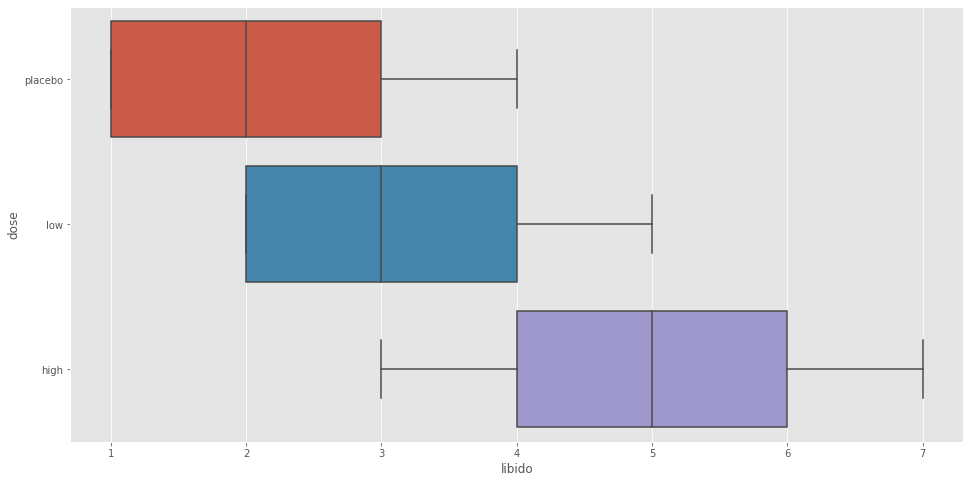

In [43]:
# boxplot of dependent and independent variables
# https://seaborn.pydata.org/generated/seaborn.boxplot.html
sns.boxplot(x=dependent, y=independent)

<br>

#### Assumption 5: Normality

***

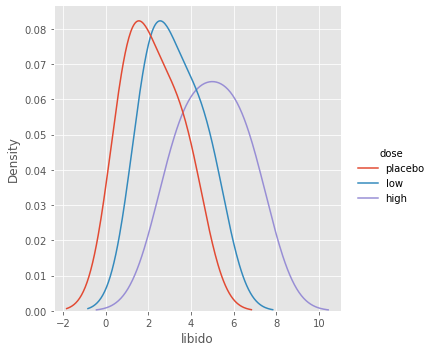

In [44]:
# KDEs of the three categories.
sns.displot(x=dependent, hue=independent, kind="kde")

#### scipy.stats.shapiro(x)
***

Perform the Shapiro-Wilk test for normality.

The Shapiro-Wilk test tests the null hypothesis that the data was drawn from a normal distribution.[scipy documentation](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.shapiro.html)

In [45]:
# Extract low dose variable
low_dose = dependent[independent == 'low']
low_dose

5    5
6    2
7    4
8    2
9    3
Name: libido, dtype: int64

In [46]:
stats.shapiro(low_dose)

ShapiroResult(statistic=0.902019739151001, pvalue=0.421149343252182)

In [47]:
# Extract high dose variable
high_dose = dependent[independent == 'high']
high_dose

10    7
11    4
12    5
13    3
14    6
Name: libido, dtype: int64

In [48]:
# Run the Shapiro-Wilk test.
stats.shapiro(high_dose)

ShapiroResult(statistic=0.9867621660232544, pvalue=0.9671739339828491)

In [49]:
# Run the Shapiro-Wilk test.
placebo = dependent[independent == 'placebo']
placebo

0    3
1    2
2    1
3    1
4    4
Name: libido, dtype: int64

In [50]:
# Run the Shapiro-Wilk test.
stats.shapiro(placebo)

ShapiroResult(statistic=0.902019739151001, pvalue=0.421149343252182)


##### scipy.stats.probplot(x, sparams=(), dist='norm', fit=True, plot=None, rvalue=False)

***

- Calculate quantiles for a probability plot, and optionally show the plot.


[scipy.stats.probplot](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.probplot.html)

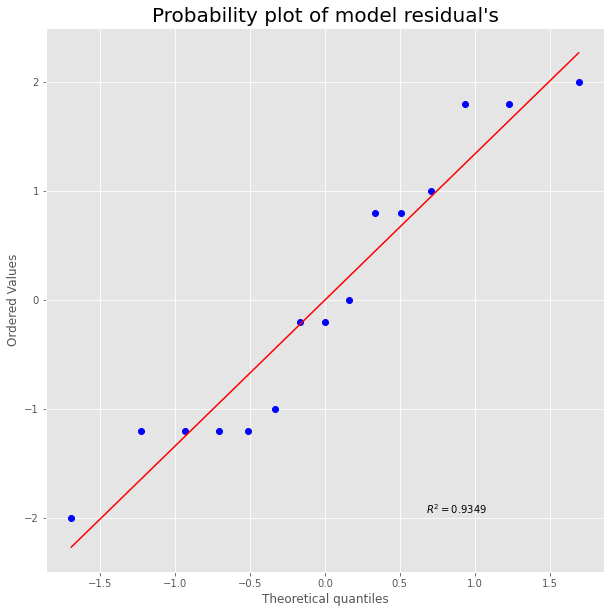

In [51]:
# plot 
fig = plt.figure(figsize= (10, 10))
ax = fig.add_subplot(111)

# generating probability plot of model residuals 
normality_plot, stat = stats.probplot(model.resid, plot= plt, rvalue= True)
ax.set_title("Probability plot of model residual's", fontsize= 20)
ax.set

plt.show()


The statistical testing method indicated the residuals were normally distributed, but the probability plot correlation coefficient (PPCC) indicated non-normality. 

<br>

#### Assumption 6: Homogeneity of Variances

https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.levene.html

https://statistics.laerd.com/statistical-guides/independent-t-test-statistical-guide.php

***



##### scipy.stats.levene(*args, center='median', proportiontocut=0.05)
***

- Perform Levene test for equal variances.

The Levene test tests the null hypothesis that all input samples are from populations with equal variances. [scipy documentation](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.levene.html)

In [52]:
# tesing for equal variances
stats.levene(df['libido'][df['dose'] == 'high'],
             df['libido'][df['dose'] == 'low'],
             df['libido'][df['dose'] == 'placebo'])

LeveneResult(statistic=0.11764705882352934, pvalue=0.8900225182757423)

The levene's test is non-significant, it indicated that the groups have non-statistically significant differences in their variability. We can see this graphically on a box plot. 

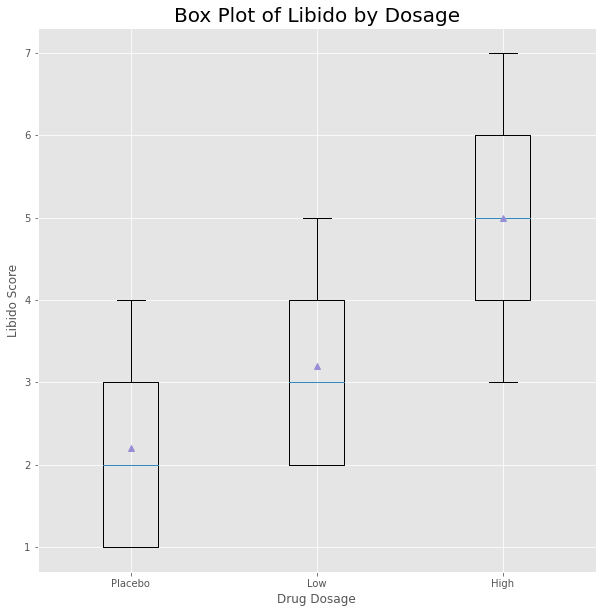

In [53]:
fig = plt.figure(figsize= (10, 10))
ax = fig.add_subplot(111)

ax.set_title("Box Plot of Libido by Dosage", fontsize= 20)
ax.set

data = [df['libido'][df['dose'] == 'placebo'],
        df['libido'][df['dose'] == 'low'],
        df['libido'][df['dose'] == 'high']]

ax.boxplot(data,
           labels= ['Placebo', 'Low', 'High'],
           showmeans= True)

plt.xlabel("Drug Dosage")
plt.ylabel("Libido Score")

plt.show()

The graphical testing of homogeneity of variances supports the statistical testing findings which is the groups have equal variance. 

<br>

## Conducting an one-way ANOVA using scipy.stats<a name = "conducting" ></a>
***


#### scipy.stats.f_oneway(*args, axis=0)

Perform one-way ANOVA.

The one-way ANOVA tests the null hypothesis that two or more groups have the same population mean. The test is applied to samples from two or more groups, possibly with differing sizes.[scipy documentation](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.f_oneway.html) If no true variance exists between the groups, the ANOVA's F-ratio should equal close to 1.

In [54]:
stats.f_oneway(df['libido'][df['dose'] == 'high'],
               df['libido'][df['dose'] == 'low'],
               df['libido'][df['dose'] == 'placebo'])

F_onewayResult(statistic=5.11864406779661, pvalue=0.024694289538222603)

<b>Conclusion: </b> the mean libido of high, low, and placebo doses are different which supports the alternative hypothesis. H(a). 

### Unequal Variances
***

In [55]:
# https://github.com/scipy/scipy/issues/11122#issuecomment-587964214

def welch_anova_np(*args, var_equal=False):
    # https://svn.r-project.org/R/trunk/src/library/stats/R/oneway.test.R
    # translated from R Welch ANOVA (not assuming equal variance)

    F_onewayResult = co.namedtuple('F_onewayResult', ('statistic', 'pvalue'))

    args = [np.asarray(arg, dtype=float) for arg in args]
    k = len(args)
    ni = np.array([len(arg) for arg in args])
    mi = np.array([np.mean(arg) for arg in args])
    vi = np.array([np.var(arg,ddof=1) for arg in args])
    wi = ni/vi

    tmp =sum((1-wi/sum(wi))**2 / (ni-1))
    tmp /= (k**2 -1)

    dfbn = k - 1
    dfwn = 1 / (3 * tmp)

    m = sum(mi*wi) / sum(wi)
    f = sum(wi * (mi - m)**2) /((dfbn) * (1 + 2 * (dfbn - 1) * tmp))
    prob = spec.fdtrc(dfbn, dfwn, f)   # equivalent to stats.f.sf
    return F_onewayResult(f, prob)

In [56]:
# Perform the test.
welch_anova_np(low_dose, placebo, high_dose)

F_onewayResult(statistic=4.3204511728135735, pvalue=0.05373847071167276)

### Post-hoc Testing <a name = "Post-hocTesting"> <a/>
***


statsmodels uses Tukey Honestly Significant Difference (HSD) to produce the following. 
<b> statsmodels.stats.multicomp.pairwise_tukeyhsd(endog, groups, alpha=0.05 </b> 
Calculate all pairwise comparisons with TukeyHSD confidence intervals [statsmodels documentation](https://www.statsmodels.org/dev/generated/statsmodels.stats.multicomp.pairwise_tukeyhsd.html)

In [57]:
import statsmodels.stats.multicomp as mc

comp = mc.MultiComparison(df['libido'], df['dose'])
post_hoc_res = comp.tukeyhsd()
post_hoc_res.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
high,low,-1.8,0.1472,-4.1651,0.5651,False
high,placebo,-2.8,0.0209,-5.1651,-0.4349,True
low,placebo,-1.0,0.5171,-3.3651,1.3651,False


- group1 and group2 columns are the groups being compared
- meandiff is the difference between the group means
- p-adj is the corrected p-value which takes into account the multiple comparisons being conducted
- lower is the lower band of the confidence interval.
- upper is the upper band of the confidence interval.
- reject is the decision rule based on the corrected p-value 

[python for datascience](https://www.pythonfordatascience.org/home)

Plot the difference with <b> statsmodels.sandbox.stats.multicomp.TukeyHSDResults.plot_simultaneous</b>


[statsmodels documentation](https://www.statsmodels.org/dev/generated/statsmodels.sandbox.stats.multicomp.TukeyHSDResults.plot_simultaneous.html)


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\sandbox\stats\multicomp.py:775: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_yticklabels(np.insert(self.groupsunique.astype(str), 0, ''))


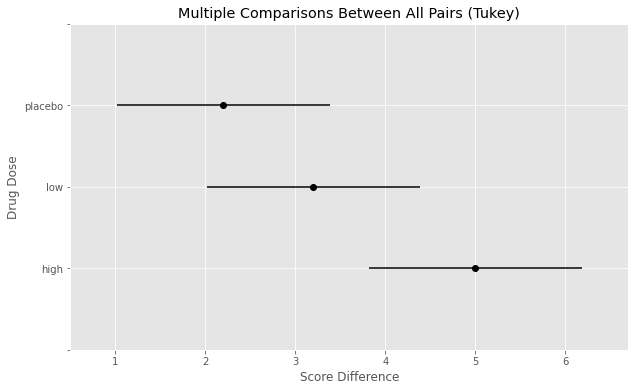

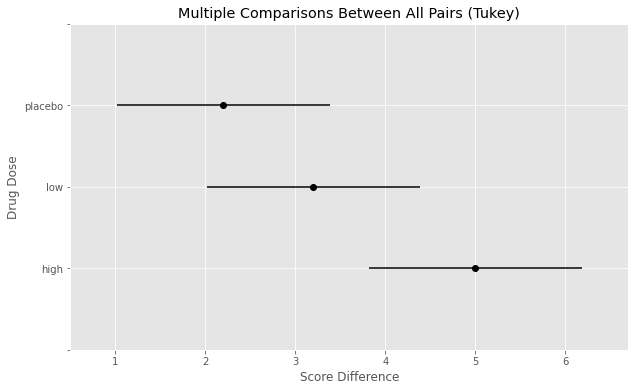

In [58]:
post_hoc_res.plot_simultaneous(ylabel= "Drug Dose", xlabel= "Score Difference")

<b> Result: </b> The box plot shows clearly that  there is a statistically significant difference in libido score between those who took the placebo and those who took the high dosage of the medication. This tells us that the medication made a significant difference to libido and that the medication works. Again, it is good to remember that this is a ficticious dataset that was designed to show this results. 

## Two-way Anova <a name = "twoway"></a>
***

A two-way ANOVA 

# References <a name = References></a>


- Ian McLoughlin course material
- Ian Mc loughlin jupyter teaching notebooks [test.ipynb](https://nbviewer.org/github/ianmcloughlin/jupyter-teaching-notebooks/blob/main/ttest.ipynb), [random_values.ipynb](https://github.com/ianmcloughlin/jupyter-teaching-notebooks/blob/main/random_values.ipynb), [one-way_anova.ipynb](https://github.com/ianmcloughlin/python_anova/blob/main/one_way_anova.ipynb)
- Statistical functions (scipy.stats) — SciPy v1.7.1 Manual, many scipy.stats features referenced throughout the notebook,  from [Scipy documentation](https://docs.scipy.org/doc/scipy/reference/stats.html) [Accessed September-December 2021]
- SciPy - Stats [Tutorialspoint.com](https://www.tutorialspoint.com/scipy/scipy_stats.htm)
- How Analysis of Variance (ANOVA) Works
[Investopedia](https://www.investopedia.com/terms/a/anova.asp)
- What is ANOVA (Analysis Of Variance) | Qualtrics
[Qualtrics](https://www.qualtrics.com/uk/experience-management/research/anova/?rid=ip&prevsite=en&newsite=uk&geo=IE&geomatch=uk)
- P.F. Dubois, editor. Python: batteries included, volume 9 of Computing in Science & Engineering. IEEE/AIP, May 2007 [available here](http://csc.ucdavis.edu/~cmg/Group/readings/pythonissue_1of4.pdf) [Accessed 5 November 2021]
-[scipy.stats.ttest_ind](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html) [Accessed: November 2021]
-[scipy.stats.ttest_1samp](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_1samp.html) [Accessed: November 2021]
-[scipy.stats.ttest_rel](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_rel.html) [Accessed: November 2021]
- One-way ANOVA in SPSS Statistics - Step-by-step procedure including testing of assumptions, [Statistics.laerd.com](https://statistics.laerd.com/spss-tutorials/one-way-anova-using-spss-statistics.php) [Accessed: November 2021]
- Virtanen P, Gommers R, Oliphant TE, Haberland M, Reddy T, Cournapeau D, Burovski E, Peterson P, Weckesser W, Bright J, van der Walt SJ. SciPy 1.0: fundamental algorithms for scientific computing in Python. Nature methods. 2020 Mar;17(3):261-72
- Renesh Bedre , "ANOVA using Python (with examples)", [www.reneshbedre.com](https://www.reneshbedre.com/blog/anova.html)[Accessed: 20 November 2021]
- Guest Blog — June 8, 2020 , "Introduction to ANOVA for Statistics and Data Science (with COVID-19 Case Study using Python)"[analyticvidhya.com](https://www.analyticsvidhya.com/blog/2020/06/introduction-anova-statistics-data-science-covid-python/) [Accessed: November 2021]
-  One-way ANOVA with Python, available at: [python for data science](https://www.pythonfordatascience.org/anova-python/)
- Statistics in Python - Using ANOVA for Feature Selection, [towardsdatascience](https://towardsdatascience.com/statistics-in-python-using-anova-for-feature-selection-b4dc876ef4f0) [Accessed: November 2021]
- Python Examples of scipy.stats.f_oneway [programcreek](https://www.programcreek.com/python/example/55221/scipy.stats.f_oneway) [Accessed: November 2021]
- Opensourcefordatascience/Data-sets: Data sets used in examples , [Opensourcefordatascience](https://github.com/Opensourcefordatascience/Data-sets) [Accessed: November 2021]
- Probability Distributions in Python Tutorial, [datacamp](https://www.datacamp.com/community/tutorials/probability-distributions-python) [Accessed: November 2021]
- geeks for geeeks, "scipy stats mode function", 11 Feb, 2019 [available at](https://www.geeksforgeeks.org/scipy-stats-mode-function-python/). [accessed 13/12/2021]
- geeks for geeks "scipy stats skew python", 11 feb 2019, [available at](https://www.geeksforgeeks.org/scipy-stats-skew-python/). [Accessed 13/12/2021]
- real-statistics.com, "Assumptions for Anova", [available at](https://www.real-statistics.com/one-way-analysis-of-variance-anova/assumptions-anova/), [Accessed: Decmeber 2021]
- geeks for geeks "scipy stats.kurtosis() function | Python", [available at](https://www.geeksforgeeks.org/scipy-stats-kurtosis-function-python/?ref=gcse) [Accessed December 2021]
- Python for data science, "Independent T-Test", [available at](https://www.pythonfordatascience.org/independent-samples-t-test-python/), [Accessed December 2021]
***

## End

In [59]:
# for requirements.txt folder, will be removed when notebook completed. 
#import session_info
#session_info.show()